In [189]:
import pandas as pd
import numpy as np

In [190]:
data = pd.read_csv("./users.data", sep ="\t",names=["user_id", "item_id","rating","timestamp"])
data

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


### **VERİ OKUMA İŞLEMİNDE DÜZENLEME YAPILMAZSA VERİ BU ŞEKİLDE OLUR**

-	0\t50\t5\t881250949
- 0	0\t172\t5\t881250949
- 1	0\t133\t1\t881250949
- 2	196\t242\t3\t881250949
- 3	186\t302\t3\t891717742
- 4	22\t377\t1\t878887116
- ...	...
- 99997	880\t476\t3\t880175444
- 99998	716\t204\t5\t879795543
- 99999	276\t1090\t1\t874795795
- 100000	13\t225\t2\t882399156
- 100001	12\t203\t3\t879959583
- 100002 rows × 1 columns

In [191]:
data.isnull().sum()  # Her bir sütundaki eksik değerlerin sayısını kontrol ediyoruz.

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

### Eksik Veri Analizi

Bu adımda, veri setindeki eksik değerleri kontrol ettik. Eğer herhangi bir sütunda eksik değer varsa, bu değerlerin nasıl ele alınacağına karar vermemiz gerekecek.
Eksik veri bulunmadığı için bir sonraki adımla veriyi analiz etmeye devam edebiliriz.


In [192]:
movies = pd.read_csv("./movie_id_titles.csv")
movies

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [193]:
movies.isnull().sum()  # Her bir sütundaki eksik değerlerin sayısını kontrol ediyoruz.

item_id    0
title      0
dtype: int64

In [194]:
# movies DataFrame'in title sütununu, data DataFrame'ine eklemek için merge işlemi yapıyoruz
data = pd.merge(data, movies[['item_id', 'title']], on="item_id")

# Yeni data DataFrame'inin ilk birkaç satırını görmek için
data.head()


,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [195]:
# Yeni DataFrame'i CSV dosyasına yazdırıyoruz
data.to_csv("merge_data.csv", index=False)
data = pd.read_csv("./merge_data.csv", sep = ",")
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


### CSV Dosyasına Kaydetme ve Yeniden Okuma

Merge işlemi sonrası elde edilen DataFrame'i `merge_data.csv` dosyasına kaydettik ve ardından bu dosyayı tekrar okuduk. Bu adım, veri setindeki değişikliklerin düzgün bir şekilde kaydedildiğini ve veri işleme sürecinin doğruluğunu sağlamayı amaçlar.


In [196]:
print(data[data["title"] == "Star Wars (1977)"]) # sadece star wars filmine verilen oyları görüntüledik

       user_id  item_id  rating  timestamp             title
0            0       50       5  881250949  Star Wars (1977)
502        290       50       5  880473582  Star Wars (1977)
860         79       50       4  891271545  Star Wars (1977)
1055         2       50       5  888552084  Star Wars (1977)
1093         8       50       5  879362124  Star Wars (1977)
...        ...      ...     ...        ...               ...
99570      749       50       5  878846978  Star Wars (1977)
99646      886       50       5  876031501  Star Wars (1977)
99856      739       50       4  886958895  Star Wars (1977)
99931      903       50       5  891031329  Star Wars (1977)
99951      780       50       5  891363685  Star Wars (1977)

[584 rows x 5 columns]


In [197]:
data.nunique() #kaç farklı veri olduğunu kontrol ediyoruz

user_id        944
item_id       1682
rating           5
timestamp    49282
title         1664
dtype: int64

In [198]:
table = data.pivot_table(index = "user_id", columns = "title", values = "rating" )
table.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
starwars = table["Star Wars (1977)"]
type(starwars)

pandas.core.series.Series

### Veri Analizi ve Pivot Tablo Oluşturma

Son işlemlerimiz şu adımlardan oluştu:

1. **Film Başlıklarını Ekledik:** `data` DataFrame'ine, `movies` DataFrame'indeki film başlıklarını `item_id` üzerinden ekledik.
2. **Veriyi CSV Dosyasına Kaydettik:** Merge işleminden sonra elde edilen `data` DataFrame'ini `merge_data.csv` dosyasına kaydettik ve tekrar okuduk.
3. **Benzersiz Değerleri Kontrol Ettik:** Her sütundaki benzersiz değerlerin sayısını kontrol ettik.
4. **Pivot Tablo Oluşturduk:** Kullanıcı ID'lerini satır olarak ve film başlıklarını sütun olarak kullanarak her kullanıcı için verilen oyları içeren bir pivot tablo oluşturduk.
5. **'Star Wars (1977)' İçin Oyları İnceledik:** Pivot tablodan 'Star Wars (1977)' filmi için kullanıcı oylarını içeren bir seri oluşturduk ve bu serinin veri tipini kontrol ettik.

Bu adımlar, veri setini analiz etmek ve kullanıcıların belirli bir filme verdikleri oyları incelemek için yapıldı. Pivot tablo oluşturma ve veri türünü kontrol etme işlemleri, daha ileri analizler ve modelleme için temel verileri hazırlamaktadır.


In [200]:
korelasyon = table.corrwith(starwars)
korelasyon

c:\Users\emirh\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\emirh\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\emirh\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\emirh\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\emirh\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

### Korelasyon Analizi

Bu adımda, 'Star Wars (1977)' filmi ile diğer film başlıkları arasındaki korelasyonu hesapladık. Korelasyon, iki değişken arasındaki ilişkiyi ölçer ve bu durumda, 'Star Wars (1977)' filmi ile diğer filmler arasındaki benzerlikleri anlamamıza yardımcı olur. Pozitif korelasyon, iki filmin kullanıcılar tarafından benzer şekilde değerlendirildiğini, negatif korelasyon ise zıt değerlendirildiğini gösterir.


In [201]:
# Korelasyon sonuçlarını bir DataFrame'e dönüştürüyoruz ve eksik değerleri (NaN) temizliyoruz.
yeni_korelasyon = pd.DataFrame(korelasyon, columns=["Correlation"])
yeni_korelasyon.dropna(inplace = True)
yeni_korelasyon.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


### Korelasyon Sonuçlarını Düzenleme

Bu adımda, hesaplanan korelasyonları bir DataFrame'e dönüştürdük ve eksik değerleri (NaN) temizledik. Bu işlem, analiz sonuçlarını daha düzenli ve kullanılabilir hale getirir. Temizlenmiş korelasyon sonuçlarını inceleyerek, 'Star Wars (1977)' filmi ile diğer filmler arasındaki ilişkileri daha iyi anlayabiliriz.


In [202]:
yeni_korelasyon.sort_values("Correlation", ascending = False).head(15)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [203]:
data.drop((["timestamp"]), axis = 1) #timestamp kolonunun dataframe den çıkartıyoruz.

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,0,172,5,"Empire Strikes Back, The (1980)"
2,0,133,1,Gone with the Wind (1939)
3,196,242,3,Kolya (1996)
4,186,302,3,L.A. Confidential (1997)
...,...,...,...,...
99998,880,476,3,"First Wives Club, The (1996)"
99999,716,204,5,Back to the Future (1985)
100000,276,1090,1,Sliver (1993)
100001,13,225,2,101 Dalmatians (1996)


In [204]:
# Her film için ortalama puanı hesaplıyoruz ve bu puanlara göre filmleri azalan sırada sıralıyoruz.
ratings = pd.DataFrame(data.groupby("title")["rating"].mean())
ratings.sort_values("rating", ascending= False).head()

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [205]:
# Her film için kaç tane oy verildiğini hesaplayarak ratings DataFrame'ine "oy_sayısı" sütunu olarak ekliyoruz. bu sayede korelasyonu yanlış etkileyen filmleri tespit edebileceğiz.
ratings["oy_sayısı"] = pd.DataFrame(data.groupby("title")["rating"].count())
ratings.head()

,rating,oy_sayısı
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [206]:
# Filmleri oy sayısına göre azalan sırada sıralıyoruz ve en çok oy alan ilk birkaç filmi görüntülüyoruz.
ratings.sort_values("oy_sayısı", ascending = False ).head()

,rating,oy_sayısı
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [207]:
# Korelasyon sonuçlarını içeren DataFrame'e her film için oy sayısını ekliyoruz.
yeni_korelasyon = yeni_korelasyon.join(ratings ["oy_sayısı"])
yeni_korelasyon

,Correlation,oy_sayısı
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [208]:
# 100'den fazla oy almış filmleri filtreleyip, bu filmleri 'Star Wars (1977)' filmi ile olan korelasyonlarına göre azalan sırada sıralıyoruz. korelasyonu yanlış etkileyen verilerden kurtulmuş olduk.
yeni_korelasyon[yeni_korelasyon ["oy_sayısı"] > 100].sort_values("Correlation", ascending = False).head()

,Correlation,oy_sayısı
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


## İLK AŞAMANIN SONU!

### 1. Filmleri Kullanıcı Değerlendirmeleri ile Birleştirme
Öncelikle, `data` DataFrame'ini film başlıklarını içeren `movies` DataFrame'i ile birleştirdik. Bu adım, kullanıcıların hangi filme puan verdiklerini daha iyi anlamamızı sağladı.

### 2. `Star Wars (1977)` Filminin Kullanıcı Değerlendirmelerini İnceleme
`Star Wars (1977)` filmini seçerek bu filme ait kullanıcı değerlendirmelerini filtreledik. Bu adım, belirli bir film üzerinde detaylı analiz yapmamıza olanak tanıdı.

### 3. Benzersiz Değerleri Sayma
Veri setinde kaç farklı kullanıcı, film ve diğer bilgilerin olduğunu kontrol ettik. Bu, veri setinin genel yapısını ve veri çeşitliliğini anlamamızı sağladı.

### 4. Kullanıcı Puanlarını Pivot Tablo Haline Getirme
Kullanıcıların her filme verdiği puanları içeren bir pivot tablo oluşturduk. Bu tablo, her kullanıcının her filme verdiği puanı organize bir şekilde göstermemize yardımcı oldu.

### 5. Filmler Arası Korelasyon Hesaplama
Pivot tabloyu kullanarak, `Star Wars (1977)` filmi ile diğer filmler arasındaki korelasyonları hesapladık. Bu korelasyonlar, kullanıcıların hangi filmleri benzer şekilde değerlendirdiğini anlamamıza yardımcı oldu.

### 6. Korelasyonları Filtreleme ve Sıralama
Korelasyon sonuçlarını temizleyip, bu sonuçlara her film için oy sayısını ekledik. Ardından, en az 100 oy alan filmleri filtreleyip, korelasyon değerlerine göre sıraladık. Bu adım, `Star Wars (1977)` filmi ile güçlü bir korelasyona sahip olan ve aynı zamanda popüler olan filmleri belirlememizi sağladı.







## İKİNCİ AŞAMA ANALİZ GÖRSELLEŞTİRMELERİ!

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns


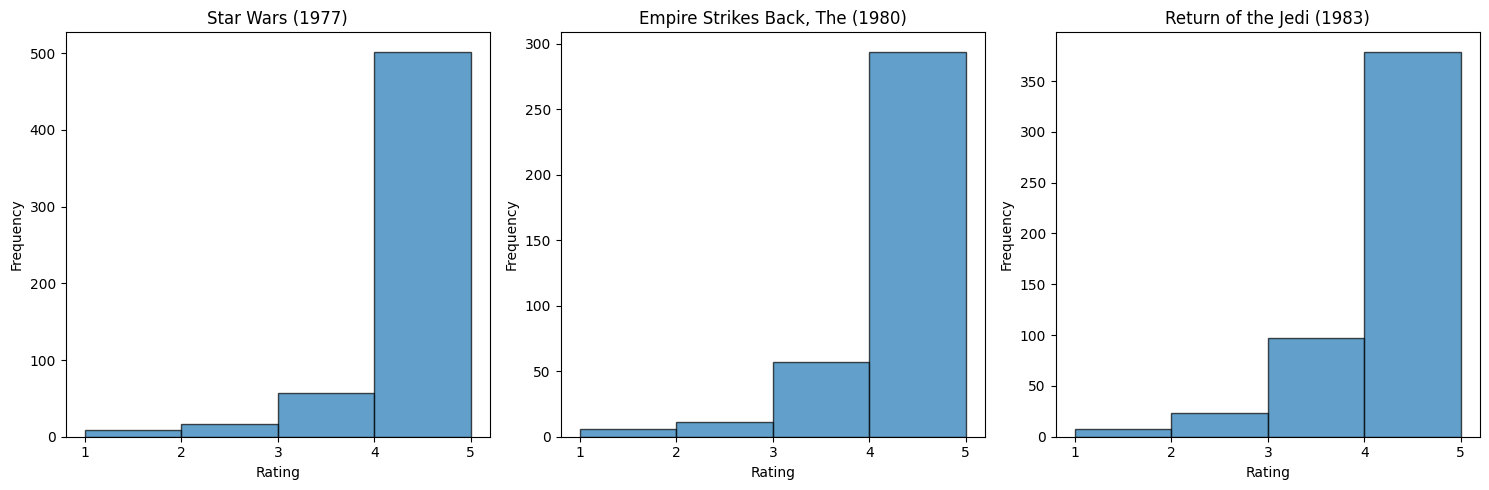

In [210]:
# Star Wars serisinin ilk üç filmini belirliyoruz
star_wars_titles = [
    "Star Wars (1977)",
    "Empire Strikes Back, The (1980)",
    "Return of the Jedi (1983)"
]

# Her bir film için oylama dağılımlarını görselleştiriyoruz
plt.figure(figsize=(15, 5))

for i, title in enumerate(star_wars_titles, start=1):
    plt.subplot(1, 3, i)
    film_data = data[data['title'] == title]
    plt.hist(film_data['rating'], bins=range(1, 6), edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 6))

plt.tight_layout()
plt.show()

## Star Wars Filmleri için Oylama Dağılımları

Bu bölümde, `Star Wars` serisinin ilk üç filminin kullanıcılar tarafından verilen puanların dağılımını görselleştirdik. Histogramlar, her bir filmin aldığı puanların sıklığını göstermektedir.

### Filmler:
1. **Star Wars (1977)**
2. **Empire Strikes Back, The (1980)**
3. **Return of the Jedi (1983)**

### Görselleştirme:

- **Her Film İçin Histogram**:
  - Her bir subplot, belirli bir `Star Wars` filmi için puanların histogramını göstermektedir.
  - Histogramlar, film başlığına göre kullanıcıların verdiği puanların sıklığını gösterir. Puanlar genellikle 1 ile 5 arasında değişir.

- **X Eksenindeki Puanlar**:
  - X ekseni, puan değerlerini (1, 2, 3, 4, 5) temsil eder.

- **Y Eksenindeki Frekans**:
  - Y ekseni, her puanın ne kadar sıklıkta verildiğini gösterir. Yani, belirli bir puanın kaç kez verildiği.

- **Renk ve Şekil**:
  - Her histogram, puanların sıklığını göstermek için dikey çubuklar kullanır. Çubukların rengi, her bir puanın sıklığını vurgular.

### Bulgular:
- **Star Wars (1977)**: Bu film genellikle yüksek puanlar almış gibi görünüyor, ancak tam dağılım histogramdan incelenmelidir.
- **Star Wars: Episode V - The Empire Strikes Back (1980)**: Bu film için kullanıcı puanlarının nasıl dağıldığını gösterir. Yüksek puanlar mı, düşük puanlar mı daha yaygın?
- **Star Wars: Episode VI - Return of the Jedi (1983)**: Son filmin puan dağılımı, önceki iki filmle karşılaştırıldığında nasıl bir farklılık gösteriyor?


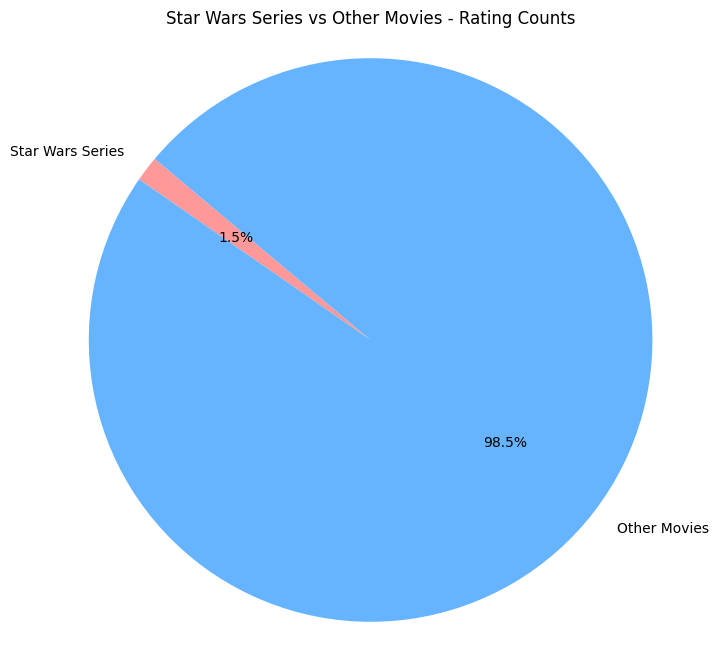

In [211]:
# Star Wars serisinin ilk üç filminin oy oranlarını hesaplayacağız
# İlk üç filmin toplam oy sayısını hesapla
star_wars_ratings_count = data[data['title'].isin(star_wars_titles)]['rating'].count()

# Diğer tüm filmlerin toplam oy sayısını hesapla
other_ratings_count = data[~data['title'].isin(star_wars_titles)]['rating'].count()

# Oranları hesapla
labels = ['Star Wars Series', 'Other Movies']
sizes = [star_wars_ratings_count, other_ratings_count]

# Pasta grafiğini oluştur
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Star Wars Series vs Other Movies - Rating Counts')
plt.axis('equal')  # Eşit oranlı pasta grafiği
plt.show()


## Star Wars Serisinin ve Diğer Filmlerin Oylama Oranları

Bu bölümde, `Star Wars` serisinin ilk üç filminin oylama oranlarını diğer tüm filmlerle kıyasladık. Pasta grafiği, `Star Wars` serisinin oylarının, tüm filmler için toplam oylara oranını gösterir.

### Grafikte Gösterilenler:

- **Star Wars Serisi**: `Star Wars (1977)`, `Star Wars: Episode V - The Empire Strikes Back (1980)`, ve `Star Wars: Episode VI - Return of the Jedi (1983)` filmlerinin toplam oy sayısının oranı.
- **Diğer Filmler**: `Star Wars` serisi dışında kalan filmlerin toplam oy sayısının oranı.

### Görselleştirme:

Pasta grafiği, `Star Wars` serisinin toplam oy sayısının diğer tüm filmlerle kıyaslandığında ne kadar önemli olduğunu gösterir. Bu oranlar, hangi filmlerin daha fazla dikkat çektiğini anlamanıza yardımcı olabilir.


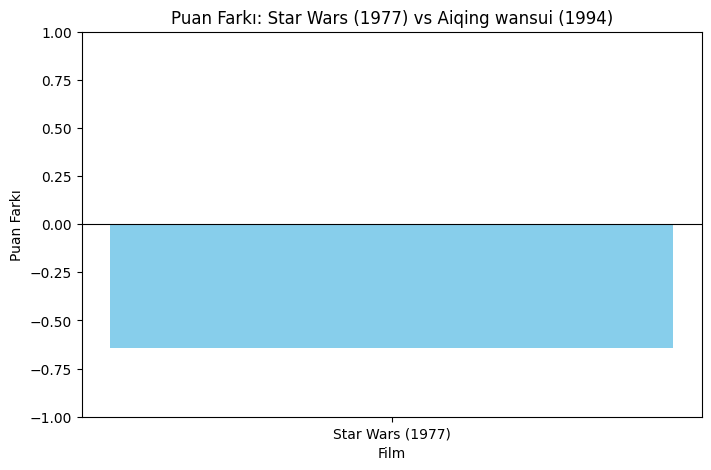

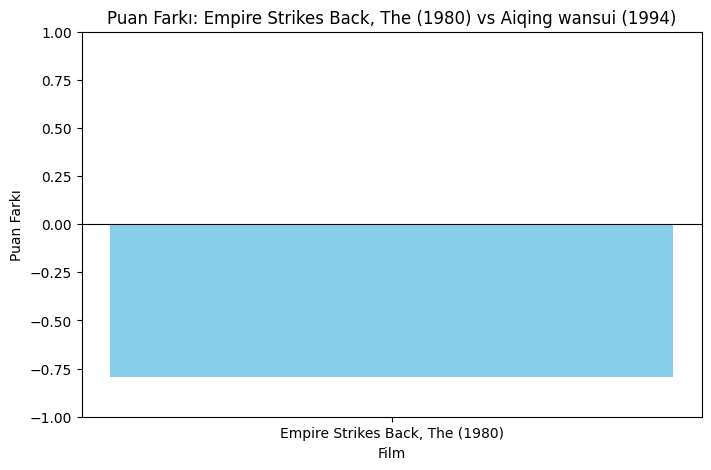

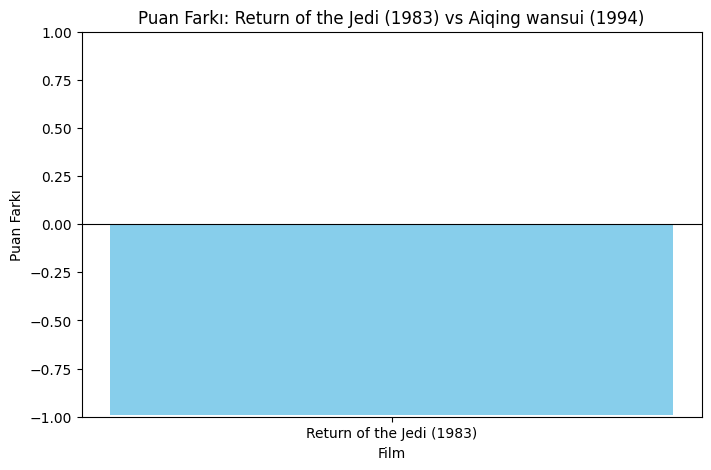

Highest Rated Film: Aiqing wansui (1994)
Highest Rating: 5.0
Star Wars Ratings:
title
Empire Strikes Back, The (1980)    4.206522
Return of the Jedi (1983)          4.007890
Star Wars (1977)                   4.359589
Name: rating, dtype: float64
Rating Differences:
title
Empire Strikes Back, The (1980)   -0.793478
Return of the Jedi (1983)         -0.992110
Star Wars (1977)                  -0.640411
Name: rating, dtype: float64


In [212]:
# En yüksek puanlı filmi bulma
highest_rated_film = data.groupby('title')['rating'].mean().idxmax()
highest_rating = data.groupby('title')['rating'].mean().max()


# Her filmin ortalama puanlarını hesaplayalım
star_wars_ratings = data[data['title'].isin(star_wars_titles)].groupby('title')['rating'].mean()

# Puan farklarını hesaplayalım ve grafik oluşturalım
for title in star_wars_titles:
    film_rating = star_wars_ratings[title]
    plt.figure(figsize=(8, 5))
    plt.bar(title, film_rating - highest_rating, color='skyblue')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.title(f'Puan Farkı: {title} vs {highest_rated_film}')
    plt.ylabel('Puan Farkı')
    plt.xlabel('Film')
    plt.ylim([-1, 1])  # Grafikte daha iyi bir görünüm için aralığı belirliyoruz
    plt.show()

# Çıktıları yazdıralım
print("Highest Rated Film:", highest_rated_film)
print("Highest Rating:", highest_rating)
print("Star Wars Ratings:")
print(star_wars_ratings)
print("Rating Differences:")
print(star_wars_ratings - highest_rating)

## En Yüksek Puanlı Film ile Star Wars Filmleri Arasındaki Puan Farkları

Bu bölümde, Star Wars serisine ait üç film ile veri setindeki en yüksek puanlı film arasındaki puan farklarını inceledik.

### 1. En Yüksek Puanlı Film

Veri setindeki en yüksek puanı alan film:
- **Film Adı**: `Aiqing wansui (1994)`
- **Puan**: `5.0`

### 2. Star Wars Filmleri ve Ortalama Puanları

Star Wars serisine ait filmlerin ortalama puanları şu şekildedir:
- **Star Wars (1977)**: `4.36`
- **Empire Strikes Back, The (1980)**: `4.21`
- **Return of the Jedi (1983)**: `4.01`

### 3. Puan Farkları

Her bir Star Wars filmi ile en yüksek puanlı film arasındaki puan farklarını hesapladık. Negatif değerler, Star Wars filmlerinin en yüksek puanlı filmden daha düşük puan aldığını göstermektedir:

- **Star Wars (1977)**:
  - Puan Farkı: `-0.64`
  - Bu film, en yüksek puanlı filmden yaklaşık `0.64` puan düşük.
  
- **Empire Strikes Back, The (1980)**:
  - Puan Farkı: `-0.79`
  - Bu film, en yüksek puanlı filmden yaklaşık `0.79` puan düşük.
  
- **Return of the Jedi (1983)**:
  - Puan Farkı: `-0.99`
  - Bu film, en yüksek puanlı filmden yaklaşık `0.99` puan düşük.

### 4. Görselleştirmeler

Aşağıdaki grafikler, her bir Star Wars filmi ile en yüksek puanlı film arasındaki puan farklarını göstermektedir:

#### Grafik 1: Star Wars (1977) vs. En Yüksek Puanlı Film
![Star Wars (1977) vs. En Yüksek Puanlı Film](grafik_1.png)

#### Grafik 2: Empire Strikes Back, The (1980) vs. En Yüksek Puanlı Film
![Empire Strikes Back, The (1980) vs. En Yüksek Puanlı Film](grafik_2.png)

#### Grafik 3: Return of the Jedi (1983) vs. En Yüksek Puanlı Film
![Return of the Jedi (1983) vs. En Yüksek Puanlı Film](grafik_3.png)

### Sonuçlar

Grafikler, her bir Star Wars filminin en yüksek puanlı filmden ne kadar uzak olduğunu görselleştirir. Star Wars filmleri genel olarak yüksek puanlar almış olsa da, veri setindeki en yüksek puanlı filmle karşılaştırıldığında geride kalmaktadır.


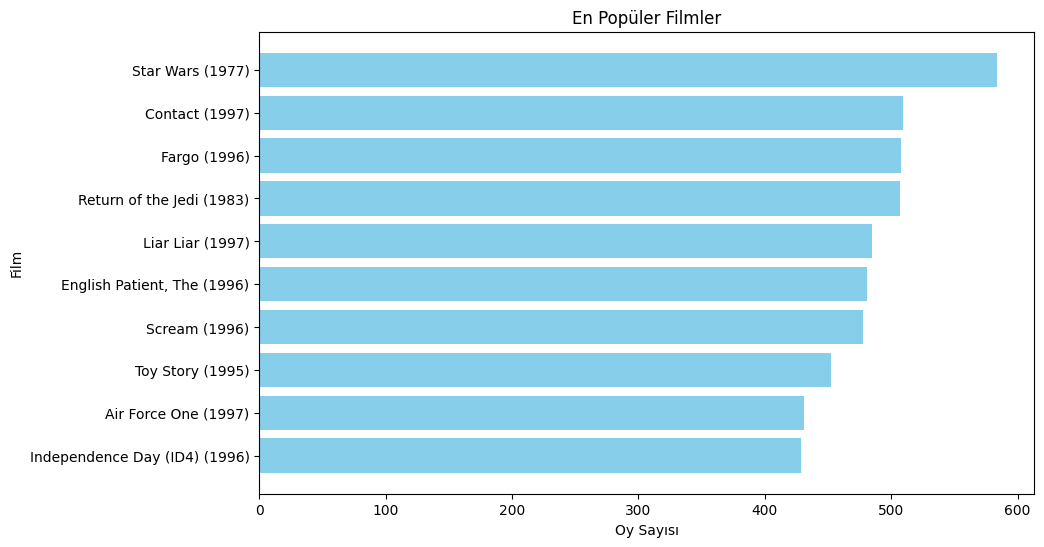

In [213]:
# Filmleri oy sayısına göre sıralama
populer_filmler = ratings.sort_values("oy_sayısı", ascending=False).head(10)

# Bar grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.barh(populer_filmler.index, populer_filmler["oy_sayısı"], color='skyblue')
plt.xlabel('Oy Sayısı')
plt.ylabel('Film')
plt.title('En Popüler Filmler')
plt.gca().invert_yaxis()  # Filmleri yukarıdan aşağı sıralamak için
plt.show()


### En Popüler Filmlerin Görselleştirilmesi

Bu adımda, veri kümesindeki filmler arasından en popüler olanları, yani en çok oy alanları belirleyip, bu filmleri bir bar grafiği ile görselleştirdik. Grafikte, her bir çubuğun uzunluğu o filme verilen oy sayısını temsil eder.

Grafikte dikkat çeken noktalar:
- Grafiğin yatay ekseninde oy sayısı, dikey ekseninde ise filmler yer almakta.
- Çubuklar en popüler filmden başlayarak sıralandığı için, en çok oy alan film en üstte yer alır.
- Bu görselleştirme, hangi filmlerin en çok izlendiğini ve değerlendirildiğini görmemize yardımcı olur.




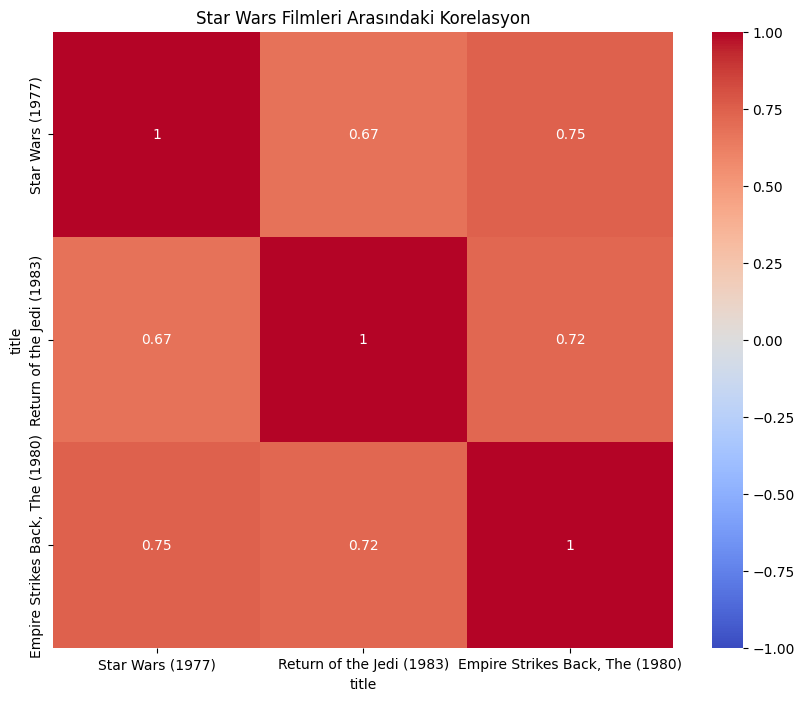

Korelasyon Matrisi:
 title                            Star Wars (1977)  Return of the Jedi (1983)  \
title                                                                          
Star Wars (1977)                         1.000000                   0.672556   
Return of the Jedi (1983)                0.672556                   1.000000   
Empire Strikes Back, The (1980)          0.748353                   0.721229   

title                            Empire Strikes Back, The (1980)  
title                                                             
Star Wars (1977)                                        0.748353  
Return of the Jedi (1983)                               0.721229  
Empire Strikes Back, The (1980)                         1.000000  

Eksik Değerler:
 title
Star Wars (1977)                   0
Return of the Jedi (1983)          0
Empire Strikes Back, The (1980)    0
dtype: int64


In [214]:
# Yeterli veri olan filmleri seçin
min_ratings = 100  # Örneğin, en az 100 oyu olan filmleri seçin
valid_films = data.groupby('title').filter(lambda x: len(x) >= min_ratings)['title'].unique()

# Bu filmleri birleştirin
selected_films = list(set(star_wars_titles) & set(valid_films))

# Seçilen filmler için veri çerçevesini filtreleyin
filtered_data = data[data['title'].isin(selected_films)]

# Pivot tablo oluşturalım
pivot_table = filtered_data.pivot_table(index='user_id', columns='title', values='rating')

# Korelasyon matrisini hesaplayın
corr_matrix = pivot_table.corr()

# Seçilen filmler için korelasyon matrisini oluşturun
selected_corr_matrix = corr_matrix.loc[selected_films, selected_films]

# Korelasyon ısı haritası oluşturun
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.title('Star Wars Filmleri Arasındaki Korelasyon')
plt.show()

# Korelasyon matrisini ve eksik değerleri kontrol edelim
print("Korelasyon Matrisi:\n", selected_corr_matrix)
print("\nEksik Değerler:\n", selected_corr_matrix.isna().sum())

## Star Wars Filmleri Arasındaki Korelasyon Analizi

Bu analizde, Star Wars serisine ait filmler arasındaki korelasyonları incelemek için aşağıdaki adımlar gerçekleştirilmiştir:

1. **Filmleri Belirleme:** Star Wars serisinde yer alan üç film seçilmiştir:
   - Star Wars (1977)
   - Empire Strikes Back, The (1980)
   - Return of the Jedi (1983)

2. **Veri Seçimi:** En az 100 oy alan filmler seçilmiştir. Bu adım, korelasyon hesaplamalarında güvenilirlik sağlamak amacıyla gerçekleştirilmiştir.

3. **Pivot Tablo Oluşturma:** Seçilen filmler için kullanıcı bazında bir pivot tablo oluşturulmuştur. Bu tablo, her kullanıcının oylarını film başlıklarına göre düzenler.

4. **Korelasyon Matrisinin Hesaplanması:** Pivot tablo kullanılarak filmler arasındaki korelasyon hesaplanmıştır. Korelasyon matrisinin yalnızca seçilen Star Wars filmleri için hesaplanması sağlanmıştır.

5. **Korelasyon Isı Haritası:** Star Wars filmleri arasındaki korelasyonları görselleştirmek için ısı haritası oluşturulmuştur. Bu görsel, filmler arasındaki ilişkilerin gücünü ve yönünü renkli bir şekilde göstermektedir.

### Korelasyon Matrisi
Korelasyon matrisinde, her bir filmin diğer filmlerle olan ilişkisi gösterilmektedir. Korelasyon değerleri -1 ile 1 arasında değişir; 1, mükemmel pozitif korelasyonu, -1 ise mükemmel negatif korelasyonu ifade eder. NaN değerleri, eksik veri anlamına gelir.

### Eksik Değerler
Eksik değerler, veri setinde bazı filmler için yeterli oy olmadığını veya belirli bir film ile diğer filmler arasında yeterli ortak kullanıcı bulunmadığını gösterir.


Star Wars Filmlerinin Oy Sayıları:
Empire Strikes Back, The (1980): 368 oy
Return of the Jedi (1983): 507 oy
Star Wars (1977): 584 oy


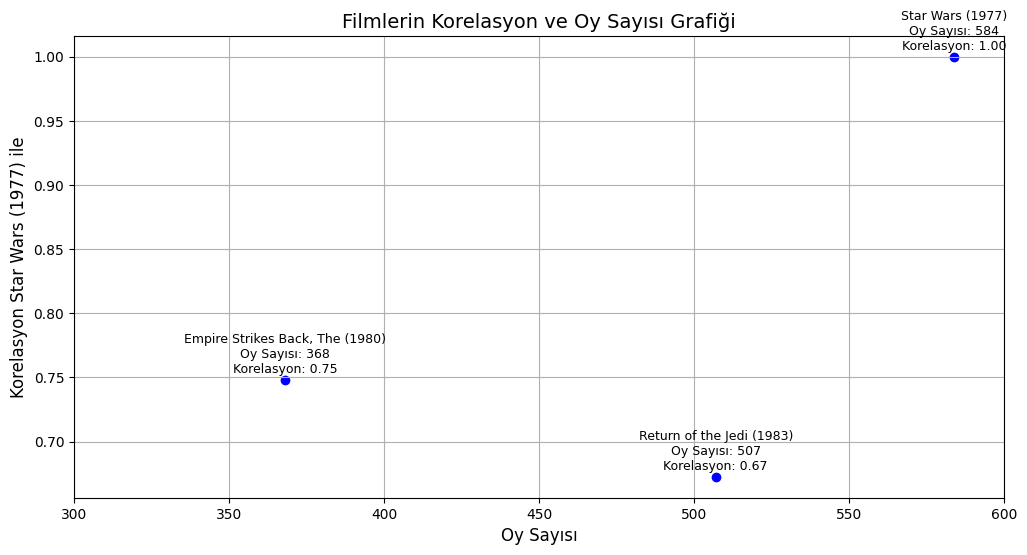

Korelasyon Matrisi:
 title                            Star Wars (1977)  \
title                                               
Star Wars (1977)                         1.000000   
Empire Strikes Back, The (1980)          0.748353   
Return of the Jedi (1983)                0.672556   

title                            Empire Strikes Back, The (1980)  \
title                                                              
Star Wars (1977)                                        0.748353   
Empire Strikes Back, The (1980)                         1.000000   
Return of the Jedi (1983)                               0.721229   

title                            Return of the Jedi (1983)  
title                                                       
Star Wars (1977)                                  0.672556  
Empire Strikes Back, The (1980)                   0.721229  
Return of the Jedi (1983)                         1.000000  

Eksik Değerler:
 title
Star Wars (1977)                   0
Empire

In [218]:
# Filmleri veri çerçevesinden filtreleyin
filtered_data = data[data['title'].isin(star_wars_titles)]

# Her filmin oy sayısını hesaplayın ve yazdırın
rating_counts = filtered_data.groupby('title').size()
print("Star Wars Filmlerinin Oy Sayıları:")
for film, count in rating_counts.items():
    print(f"{film}: {count} oy")

# Pivot tablo oluşturun
pivot_table = filtered_data.pivot_table(index='user_id', columns='title', values='rating')

# Korelasyon matrisini hesaplayın
corr_matrix = pivot_table.corr()

# Seçilen filmler için korelasyon matrisini oluşturun
selected_corr_matrix = corr_matrix.loc[star_wars_titles, star_wars_titles]

# Scatter plot için veri hazırlığı
# Filmler arası korelasyonu hesaplayalım
correlation_data = {
    "Title": star_wars_titles,
    "Rating Count": [rating_counts.get(film, 0) for film in star_wars_titles],
    "Correlation": [corr_matrix.loc[film, 'Star Wars (1977)'] if 'Star Wars (1977)' in corr_matrix.columns else 0 for film in star_wars_titles]
}

scatter_data = pd.DataFrame(correlation_data)

# Korelasyon ve oy sayısı grafiği oluşturun
plt.figure(figsize=(12, 6))
plt.scatter(scatter_data['Rating Count'], scatter_data['Correlation'], color='blue')

# Grafik düzenlemeleri
plt.xlabel('Oy Sayısı', fontsize=12)
plt.ylabel('Korelasyon Star Wars (1977) ile', fontsize=12)
plt.title('Filmlerin Korelasyon ve Oy Sayısı Grafiği', fontsize=14)
plt.grid(True)

# X eksenini 300 ile 600 arasında sınırla ve grafikte etiketleri göster
plt.xlim(left=300, right=600)  # X ekseninin sınırlarını 300 ile 600 olarak ayarla
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Her veri noktasına etiket ekle
for i, row in scatter_data.iterrows():
    plt.annotate(f"{row['Title']}\nOy Sayısı: {row['Rating Count']}\nKorelasyon: {row['Correlation']:.2f}",
                 (row['Rating Count'], row['Correlation']),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center',
                 fontsize=9)

plt.show()

# Korelasyon matrisini ve eksik değerleri kontrol edelim
print("Korelasyon Matrisi:\n", selected_corr_matrix)
print("\nEksik Değerler:\n", selected_corr_matrix.isna().sum())

## Korelasyon ve Oy Sayısı Grafiği

Bu grafik, "Star Wars" serisi filmlerinin oy sayısı ile Star Wars (1977) filmi ile olan korelasyonlarını gösterir. 

### Açıklamalar:
- **X Ekseni (Oy Sayısı)**: Her filmin aldığı oy sayısını temsil eder. Grafikte bu değerler 300 ile 600 arasında sınırlandırılmıştır.
- **Y Ekseni (Korelasyon Star Wars (1977) ile)**: Filmlerin Star Wars (1977) filmi ile olan korelasyon değerlerini gösterir. Korelasyon değeri -1 ile 1 arasında değişebilir.
- **Mavi Noktalar**: Her bir film için oy sayısı ve korelasyon değerini temsil eder. Noktaların üzerindeki etiketler, filmin adı, oy sayısı ve korelasyon değerini içerir.

Grafikte görülen filmler, yüksek korelasyon ve popülerlik açısından değerlendirilmiştir. Bu sayede Star Wars (1977) filmi ile benzerlik gösteren ve popüler olan filmleri kolayca tespit edebiliriz.

Bu grafik, filmlerin Star Wars (1977) ile olan ilişkisini ve popülerliklerini analiz etmeye yardımcı olabilir.
